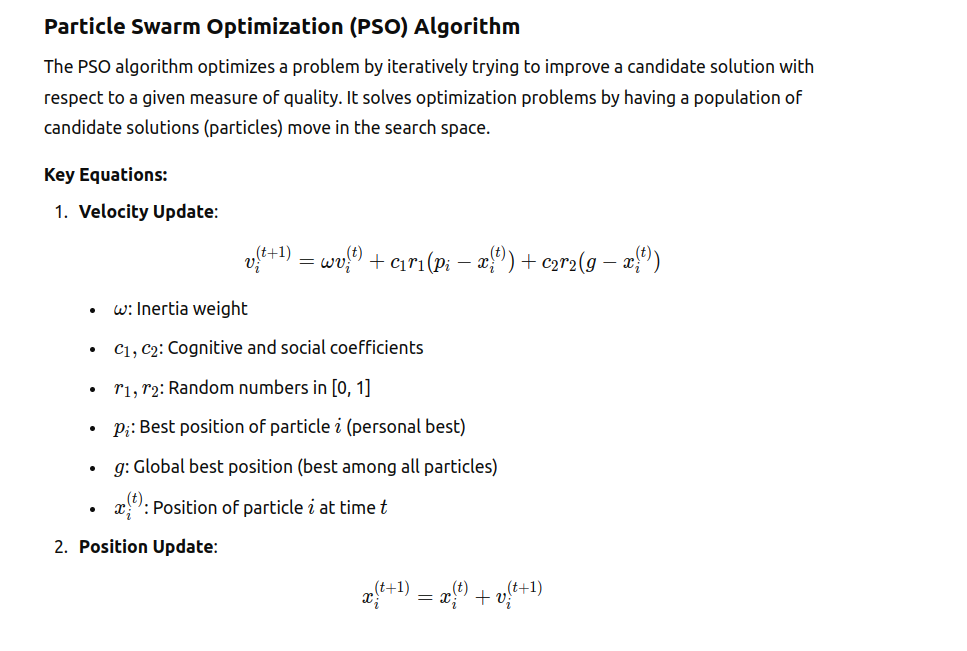

In [ ]:
import numpy as np

# Define the objective function
def objective_function(x):
    """Example: Sphere function (minimization problem)"""
    return np.sum(x**2)

# PSO Algorithm
def pso(objective_function, dim, n_particles, max_iter, bounds):
    """
    Parameters:
        objective_function: Function to optimize
        dim: Dimension of the problem
        n_particles: Number of particles
        max_iter: Maximum iterations
        bounds: Bounds for the variables [(min1, max1), (min2, max2), ...]
    Returns:
        g_best_position: Best position found
        g_best_value: Best value of the objective function
    """
    # Initialize parameters
    omega = 0.5       # Inertia weight
    c1, c2 = 1.5, 1.5  # Cognitive and social coefficients

    # Initialize particles' positions and velocities
    particles = np.random.uniform(low=[b[0] for b in bounds], high=[b[1] for b in bounds], size=(n_particles, dim))
    velocities = np.random.uniform(-1, 1, (n_particles, dim))
    
    # Initialize personal and global bests
    p_best_positions = particles.copy()
    p_best_values = np.array([objective_function(p) for p in particles])
    g_best_position = particles[np.argmin(p_best_values)]
    g_best_value = np.min(p_best_values)

    # PSO loop
    for t in range(max_iter):
        for i in range(n_particles):
            # Update velocity
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            velocities[i] = (
                omega * velocities[i]
                + c1 * r1 * (p_best_positions[i] - particles[i])
                + c2 * r2 * (g_best_position - particles[i])
            )
            # Update position
            particles[i] = particles[i] + velocities[i]

            # Apply bounds
            particles[i] = np.clip(particles[i], [b[0] for b in bounds], [b[1] for b in bounds])

            # Evaluate fitness
            fitness = objective_function(particles[i])

            # Update personal best
            if fitness < p_best_values[i]:
                p_best_positions[i] = particles[i]
                p_best_values[i] = fitness

        # Update global best
        current_g_best_value = np.min(p_best_values)
        if current_g_best_value < g_best_value:
            g_best_value = current_g_best_value
            g_best_position = p_best_positions[np.argmin(p_best_values)]

        print(f"Iteration {t+1}/{max_iter}, Best Value: {g_best_value}")

    return g_best_position, g_best_value

# Example usage
dim = 2  # Number of dimensions
n_particles = 30  # Number of particles
max_iter = 100  # Maximum iterations
bounds = [(-10, 10), (-10, 10)]  # Bounds for each dimension

best_position, best_value = pso(objective_function, dim, n_particles, max_iter, bounds)
print(f"Best Position: {best_position}, Best Value: {best_value}")

Iteration 1/100, Best Value: 0.2513052472310646
Iteration 2/100, Best Value: 0.10218775841458742
Iteration 3/100, Best Value: 0.10218775841458742
Iteration 4/100, Best Value: 0.004287786477116627
Iteration 5/100, Best Value: 0.004287786477116627
Iteration 6/100, Best Value: 0.0035789186446616742
Iteration 7/100, Best Value: 0.0035789186446616742
Iteration 8/100, Best Value: 0.0035789186446616742
Iteration 9/100, Best Value: 0.0015227116776043042
Iteration 10/100, Best Value: 0.0015227116776043042
Iteration 11/100, Best Value: 0.0009475282579618366
Iteration 12/100, Best Value: 0.00011740839288482865
Iteration 13/100, Best Value: 0.00011740839288482865
Iteration 14/100, Best Value: 0.00011740839288482865
Iteration 15/100, Best Value: 7.675627554127825e-05
Iteration 16/100, Best Value: 2.1189722216947928e-05
Iteration 17/100, Best Value: 8.092305204979745e-06
Iteration 18/100, Best Value: 5.215061611544898e-06
Iteration 19/100, Best Value: 4.694306042964786e-06
Iteration 20/100, Best Val